In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


In [2]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/reanalysis/MERRA/PRECTOT_MERRA2.tavg1_2m_flx_Nx.1980-2021.nc')
 

data

<xarray.Dataset>
Dimensions:    (time: 505, bnds: 2, lon: 576, lat: 361)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01T12:00:00 ... 2022-01-01T12:00:00
  * lon        (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat        (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    PRECTOT    (time, lat, lon) float32 ...
Attributes: (12/34)
    CDI:                               Climate Data Interface version 1.9.9rc...
    history:                           Thu Jun 16 11:24:03 2022: cdo mergetim...
    Conventions:                       CF-1
    History:                           Original file generated: Sat May 31 17...
    Comment:                           GMAO filename: d5124_m2_jan79.tavg1_2d...
    Filename:                          MERRA2_100.tavg1_2d_flx_Nx.19800101.nc4
    ...                                ...
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   1980-01-01
    RangeEndingTime:                   23:59:59.000000
    frequency:                         mon
    NCO:                               netCDF Operators version 4.8.1 (Homepa...
    CDO:                               Climate Data Operators version 1.9.9rc...

In [3]:
for v in data.variables.values():
    print(v)

<xarray.IndexVariable 'time' (time: 505)>
array(['1980-01-01T12:00:00.000000000', '1980-02-01T12:00:00.000000000',
       '1980-03-01T12:00:00.000000000', ..., '2021-11-01T12:00:00.000000000',
       '2021-12-01T12:00:00.000000000', '2022-01-01T12:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    long_name:      time
    bounds:         time_bnds
    axis:           T
<xarray.Variable (time: 505, bnds: 2)>
array([['1980-01-01T00:30:00.000000000', '1980-01-31T23:30:00.000000000'],
       ['1980-02-01T00:30:00.000000000', '1980-02-29T23:30:00.000000000'],
       ['1980-03-01T00:30:00.000000000', '1980-03-31T23:30:00.000000000'],
       ...,
       ['2021-11-01T00:30:00.000000000', '2021-11-30T23:30:00.000000000'],
       ['2021-12-01T00:30:00.000000000', '2021-12-31T23:30:00.000000000'],
       ['2022-01-16T00:30:00.000000000', '2022-01-16T23:30:00.000000000']],
      dtype='datetime64[ns]')
<xarray.IndexVariable 'lon' (lon: 576)>
array([-180.   , 

In [4]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1980-01-16T12:00:00.000000000','2015-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (time: 430, bnds: 2, lon: 576, lat: 361)
Coordinates:
  * time       (time) datetime64[ns] 1980-02-01T12:00:00 ... 2015-11-16
  * lon        (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat        (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1980-02-01T00:30:00 ... 2015-11-30...
    PRECTOT    (time, lat, lon) float32 ...
Attributes: (12/34)
    CDI:                               Climate Data Interface version 1.9.9rc...
    history:                           Thu Jun 16 11:24:03 2022: cdo mergetim...
    Conventions:                       CF-1
    History:                           Original file generated: Sat May 31 17...
    Comment:                           GMAO filename: d5124_m2_jan79.tavg1_2d...
    Filename:                          MERRA2_100.tavg1_2d_flx_Nx.19800101.nc4
    ...                                ...
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   1980-01-01
    RangeEndingTime:                   23:59:59.000000
    frequency:                         mon
    NCO:                               netCDF Operators version 4.8.1 (Homepa...
    CDO:                               Climate Data Operators version 1.9.9rc...

In [5]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (time: 144, bnds: 2, lon: 576, lat: 361)
Coordinates:
  * time       (time) datetime64[ns] 1980-06-16 ... 2015-09-16
  * lon        (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat        (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1980-06-01T00:30:00 ... 2015-09-30...
    PRECTOT    (time, lat, lon) float32 ...
Attributes: (12/34)
    CDI:                               Climate Data Interface version 1.9.9rc...
    history:                           Thu Jun 16 11:24:03 2022: cdo mergetim...
    Conventions:                       CF-1
    History:                           Original file generated: Sat May 31 17...
    Comment:                           GMAO filename: d5124_m2_jan79.tavg1_2d...
    Filename:                          MERRA2_100.tavg1_2d_flx_Nx.19800101.nc4
    ...                                ...
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   1980-01-01
    RangeEndingTime:                   23:59:59.000000
    frequency:                         mon
    NCO:                               netCDF Operators version 4.8.1 (Homepa...
    CDO:                               Climate Data Operators version 1.9.9rc...

In [6]:
#to select the x and y coordinates
#jjas_data = jjas_data.sel(lon=slice(85.0,96.0),lat=slice(18.0,29.0))
#jjas_data

In [7]:
#getting the mean for JJAS data
jjas_mean = jjas_data.PRECTOT.mean('time')
 
jjas_mean 

<xarray.DataArray 'PRECTOT' (lat: 361, lon: 576)>
array([[1.90493563e-06, 1.90493563e-06, 1.90493563e-06, ...,
        1.90493563e-06, 1.90493563e-06, 1.90493563e-06],
       [2.01234207e-06, 2.01548914e-06, 2.01861894e-06, ...,
        2.00282830e-06, 2.00601448e-06, 2.00918362e-06],
       [2.01164153e-06, 2.01833882e-06, 2.02513843e-06, ...,
        1.99213514e-06, 1.99853912e-06, 2.00504383e-06],
       ...,
       [1.22261081e-05, 1.22182628e-05, 1.22103602e-05, ...,
        1.22496385e-05, 1.22418242e-05, 1.22339889e-05],
       [1.21143867e-05, 1.21106305e-05, 1.21068351e-05, ...,
        1.21255789e-05, 1.21218636e-05, 1.21181356e-05],
       [1.18877915e-05, 1.18877915e-05, 1.18877915e-05, ...,
        1.18877915e-05, 1.18877915e-05, 1.18877915e-05]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0

In [8]:
#the data is in kg m-2 s-1 so we multiply by 86400 to convert to mm/day

pr_mm = jjas_mean*86400
pr_mm

<xarray.DataArray 'PRECTOT' (lat: 361, lon: 576)>
array([[0.16458644, 0.16458644, 0.16458644, ..., 0.16458644, 0.16458644,
        0.16458644],
       [0.17386635, 0.17413826, 0.17440868, ..., 0.17304436, 0.17331965,
        0.17359346],
       [0.17380583, 0.17438447, 0.17497196, ..., 0.17212048, 0.17267378,
        0.17323579],
       ...,
       [1.05633574, 1.0556579 , 1.05497512, ..., 1.05836877, 1.05769361,
        1.05701664],
       [1.04668301, 1.04635847, 1.04603056, ..., 1.04765002, 1.04732902,
        1.04700692],
       [1.02710519, 1.02710519, 1.02710519, ..., 1.02710519, 1.02710519,
        1.02710519]])
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0

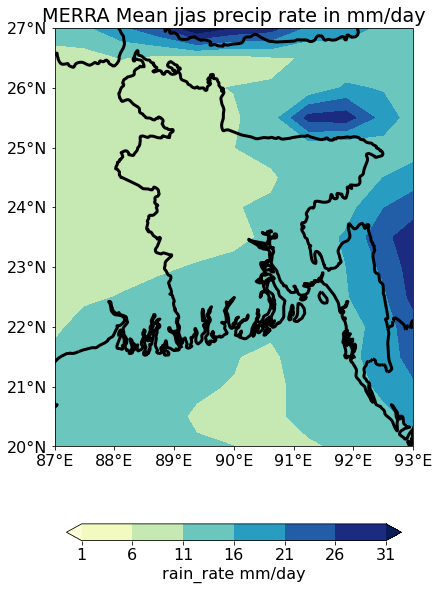

In [9]:
#plotting with cartopy jjas_pr_mean
import cartopy.feature as cfeature

plt.rcParams['font.size']=16


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


 
m1 = ax.contourf(pr_mm['lon'][:], pr_mm['lat'][:],pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')




# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)




plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'rain_rate mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)
plt.title('MERRA Mean jjas precip rate in mm/day')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_merra_jjas_mean.png")

In [10]:
annual_mean = data.PRECTOT.mean('time')
annual_mean

<xarray.DataArray 'PRECTOT' (lat: 361, lon: 576)>
array([[1.8663519e-06, 1.8663519e-06, 1.8663519e-06, ..., 1.8663519e-06,
        1.8663519e-06, 1.8663519e-06],
       [1.9811250e-06, 1.9834720e-06, 1.9858003e-06, ..., 1.9739743e-06,
        1.9763741e-06, 1.9787572e-06],
       [2.0254288e-06, 2.0310063e-06, 2.0366579e-06, ..., 2.0091111e-06,
        2.0144817e-06, 2.0199207e-06],
       ...,
       [8.8177430e-06, 8.8132765e-06, 8.8088200e-06, ..., 8.8312672e-06,
        8.8267452e-06, 8.8222369e-06],
       [8.8621582e-06, 8.8598563e-06, 8.8575298e-06, ..., 8.8691195e-06,
        8.8668048e-06, 8.8644802e-06],
       [8.8394190e-06, 8.8394190e-06, 8.8394190e-06, ..., 8.8394190e-06,
        8.8394190e-06, 8.8394190e-06]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0

In [11]:
#converting from kg m-2 s-1 to mm/day

annual_pr_mm = annual_mean*86400
annual_pr_mm

<xarray.DataArray 'PRECTOT' (lat: 361, lon: 576)>
array([[0.1612528 , 0.1612528 , 0.1612528 , ..., 0.1612528 , 0.1612528 ,
        0.1612528 ],
       [0.1711692 , 0.17137198, 0.17157314, ..., 0.17055138, 0.17075872,
        0.17096462],
       [0.17499705, 0.17547894, 0.17596724, ..., 0.1735872 , 0.17405121,
        0.17452114],
       ...,
       [0.761853  , 0.76146709, 0.76108205, ..., 0.76302149, 0.76263079,
        0.76224126],
       [0.76569047, 0.76549158, 0.76529057, ..., 0.76629192, 0.76609194,
        0.76589109],
       [0.7637258 , 0.7637258 , 0.7637258 , ..., 0.7637258 , 0.7637258 ,
        0.7637258 ]])
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0

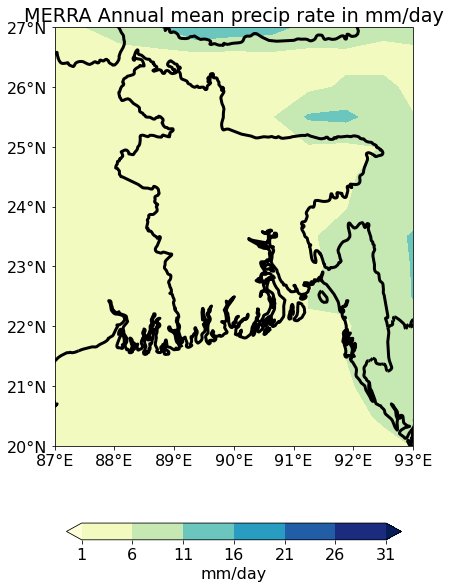

In [12]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(annual_pr_mm['lon'], annual_pr_mm['lat'],annual_pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)
#ax.add_feature(cfeature.STATES)
plt.title('MERRA Annual mean precip rate in mm/day')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_merra_annual_mean.png")